In [1]:
%%javascript
/**********************************************************************************************
Known Mathjax Issue with Chrome - a rounding issue adds a border to the right of mathjax markup
https://github.com/mathjax/MathJax/issues/1300
A quick hack to fix this based on stackoverflow discussions: 
http://stackoverflow.com/questions/34277967/chrome-rendering-mathjax-equations-with-a-trailing-vertical-line
**********************************************************************************************/

$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

In [2]:
%reload_ext autoreload
%autoreload 2

# MIDS - w261 Machine Learning At Scale
__Course Lead:__ Dr James G. Shanahan (__email__ Jimi via  James.Shanahan _AT_ gmail.com)

## Assignment - HW10


---
__Name:__  *Your Name Goes Here*   
__Class:__ MIDS w261 (Section *Your Section Goes Here*, e.g., Summer 2016 Group 1)     
__Email:__  *Your UC Berkeley Email Goes Here*@iSchool.Berkeley.edu     
__Week:__   10

# Table of Contents <a name="TOC"></a> 

1.  [HW Introduction](#1)   
2.  [HW References](#2)
3.  [HW Problems](#3)   
    10.0.  [Short Answer Questions](#HW10.0)    
    10.1.  [Word Count plus sorting](#HW10.1)   
    10.2.  [MLlib-centric Kmeans](#HW10.2)    
    10.3.  [Homegrown KMeans in Spark](#HW10.3)    
    10.4.  [Making Homegrown KMeans more efficient](#HW10.4)  
    10.5.  [OPTIONAL Weighted KMeans](#HW10.5)  
    10.6.  [OPTIONAL Linear Regression](#HW10.6)  
    10.7.  [OPTIONAL Error surfaces](#HW10.7)



<a name="1">
# 1 Instructions
[Back to Table of Contents](#TOC)
* Homework submissions are due by Tueday, 07/28/2016 at 11AM (West Coast Time).


* Prepare a single Jupyter note, please include questions, and question numbers in the questions and in the responses.
Submit your homework notebook via the following form:

   + [Submission Link - Google Form](
https://docs.google.com/forms/d/1ZOr9RnIe_A06AcZDB6K1mJN4vrLeSmS2PD6Xm3eOiis/viewform?usp=send_form 
)


### Documents:
* IPython Notebook, published and viewable online.
* PDF export of IPython Notebook.
    
<a name="2">
# 2 Useful References
[Back to Table of Contents](#TOC)

* Karau, Holden, Konwinski, Andy, Wendell, Patrick, & Zaharia, Matei. (2015). Learning Spark: Lightning-fast big data analysis. Sebastopol, CA: O’Reilly Publishers.
* Hastie, Trevor, Tibshirani, Robert, & Friedman, Jerome. (2009). The elements of statistical learning: Data mining, inference, and prediction (2nd ed.). Stanford, CA: Springer Science+Business Media. (Download for free [here](http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf))

<a name="3">
# 3 HW Problems
[Back to Table of Contents](#TOC)

<a name="HW10.0"></a><h2 style="color:darkblue"> HW10.0: Short answer questions </h2>
[Back to Table of Contents](#TOC)


__What is Apache Spark and how is it different to Apache Hadoop? __

__Fill in the blanks:
Spark API consists of interfaces to develop applications based on it in Java, ___ BLANKS __ languages (list languages). __

<hr>

__Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or ????? in a distributed manner. __

<hr>

__What is an RDD and show a fun example of creating one and bringing the first element back to the driver program. __

<hr>


<a name="HW10.1"> <h2 style="color:darkgreen">HW10.1 WordCount plus sorting </h2>
[Back to Table of Contents](#TOC)

The following notebooks will be useful to jumpstart this collection of Homework exercises:


* [Example Notebook with Debugging tactics in Spark](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/jqjllp8kmf1eolk/WordCountDebugging-Example.ipynb)
* [Word Count Quiz](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/vgmpivsi4rvqz0s/WordCountQuiz.ipynb)
* [Work Count Solution](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/dxv3dmp1vluuo8i/WordCountQuiz-Solution.ipynb)

---
In Spark write the code to count how often each word appears in a text document (or set of documents). Please use this homework document (with no solutions in it) as a the example document to run an experiment.  Report the following: 
* provide a sorted list of tokens in decreasing order of frequency of occurence limited to [top 20 most frequent only] and [bottom 10 least frequent]. 


__OPTIONAL__ 
Feel free to do a secondary sort where words with the same frequncy are sorted alphanumerically increasing. Please refer to the [following notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/uu5afr3ufpm9fy8/SecondarySort.ipynb)
 for examples of secondary sorts in Spark. Please provide the following [top 20 most frequent terms only] and [bottom 10 least frequent terms]

__NOTE__ [Please incorporate all referenced notebooks directly into this master notebook as cells for HW submission. I.e., HW submissions should comprise of just one notebook]

#### ANSWER:

Below is the code that computes a sorted list of tokens in decreasing order of frequency of occurence limited to [top 20 most frequent only] and [bottom 10 least frequent].

In [3]:
import os
import sys

import pyspark
from pyspark.sql import SQLContext

# We can give a name to our app (to find it in Spark WebUI) and configure execution mode
# In this case, it is local multicore execution with "local[*]"
app_name = "HW10"
master = "local[*]"
conf = pyspark.SparkConf().setAppName(app_name).setMaster(master)
sc = pyspark.SparkContext(conf=conf)
sqlContext = SQLContext(sc)


print sc
print sqlContext

In [6]:
input_file = "/home/jovyan/work/root/w261/HW10/data/MIDS-MLS-HW-10.txt"

In [7]:
import re
def removePunctuation(text):
    text=text.lower().strip()
#     text=re.sub(".","", text)
    text = re.sub("\!|\?|\.|,|:|;|\(|\)|=","",text)
    return text

def wordCount(wordListRDD):
    return wordListRDD.map(lambda x:(x,1)).reduceByKey(lambda a,b:a+b)

In [8]:
toyRDD = (sc.textFile(input_file, 8).map(removePunctuation))

In [9]:
toyRDD_words = toyRDD.flatMap(lambda x:x.split(" "))

In [10]:
toyRDD_words = toyRDD_words.filter(lambda x:x!='')
toyRDD_words.cache()

In [15]:
toyRDD_words_sorted_top = wordCount(toyRDD_words).sortBy(lambda x: -x[1])
print "Top 20 words:\n"
for pair in toyRDD_words_sorted_top.take(20):
    print "%s\t%s"%(pair[0], pair[1])
toyRDD_words_sorted_bottom = wordCount(toyRDD_words).sortBy(lambda x: x[1])
print "\nBottom 10 words:\n"
for pair in toyRDD_words_sorted_bottom.take(10):
    print "%s\t%s"%(pair[0], pair[1])

Top 20 words:

the	71
and	36
in	27
of	24
a	18
using	14
plot	13
code	13
to	12
model	12
data	12
hw	12
for	12
is	11
with	11
as	10
on	9
kmeans	9
this	8
set	8

Bottom 10 words:

2016-07-19	1
parse	1
consists	1
descentafter	1
datsci	1
download	1
versus	1
taken	1
clustering	1
print"within	1


<a name="HW10.1.1"><h2 style="color:darkgreen">HW10.1.1 </h2>
[Back to Table of Contents](#TOC)

Modify the above word count code to count words that begin with lower case letters (a-z) and report your findings. Again sort the output words in decreasing order of frequency.


#### ANSWER:

Below is the code that computes a sorted list of words that begin with lower case letters (a-z) in decreasing order of frequency of occurence limited to [top 20 most frequent only] and [bottom 10 least frequent].

In [16]:
def checklowercase(word):
    return word[0].islower()

toyRDD_lc = (sc.textFile(input_file, 8))

toyRDD_lc_words = toyRDD_lc\
.flatMap(lambda x:x.split(" "))\
.filter(lambda x:x!='')

toyRDD_lc_words = toyRDD_lc_words\
.filter(lambda x:x!='')\
.filter(checklowercase)

toyRDD_lc_words.cache()

toyRDD_lc_words_sorted_top = wordCount(toyRDD_lc_words).sortBy(lambda x: -x[1])
print "Top 20 words:\n"
for pair in toyRDD_lc_words_sorted_top.take(20):
    print "%s\t%s"%(pair[0], pair[1])
toyRDD_lc_words_sorted_bottom = wordCount(toyRDD_lc_words).sortBy(lambda x: x[1])
print "\nBottom 10 words:\n"
for pair in toyRDD_lc_words_sorted_bottom.take(10):
    print "%s\t%s"%(pair[0], pair[1])

Top 20 words:

the	70
and	36
in	25
of	24
a	18
to	12
code	12
for	12
is	11
model	11
data	10
with	10
on	9
plot	9
as	9
this	8
your	8
each	7
domain	6
from	6

Bottom 10 words:

y)	1
generation	1
array([float(x)	1
https://www.dropbox.com/s/3xc3kwda6d254l5/PlotModelAndDomainSpaces.R?dl=0	1
parse	1
not	1
consists	1
versus	1
taken	1
clustering	1


<a name="HW10.2"> <h2 style="color:darkblue"> HW10.2: MLlib-centric KMeans</h2>
[Back to Table of Contents](#TOC)

Using the following  MLlib-centric KMeans code snippet: 

<pre>
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt


# Load and parse the data
# NOTE  kmeans_data.txt is available here 
#          https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("kmeans_data.txt")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

# Save and load model
clusters.save(sc, "myModelPath")
sameModel = KMeansModel.load(sc, "myModelPath")

</pre>

__NOTE__ <p> The  __kmeans_data.txt__ is available here https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 

__TASKS__
* Run this code snippet and list the clusters that your find.
* compute the Within Set Sum of Squared Errors for the found clusters. Comment on your findings.

##### ANSWER:

We find that the global within set sum of squared errors (WSSSE) is $0.69$ when running a K-means algorithm on the dataset provided. The six data points provided in the data set organically fit into two clusters and the two clusters computed have a relatively low WSSSE, particularly given the similarity of the points within each of the clusters.

In [22]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# Load and parse the data
# NOTE  kmeans_data.txt is available here 
#          https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("/home/jovyan/work/root/w261/HW10/data/kmeans_data.txt")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2,
                        maxIterations=10,
                        runs=1,
                        initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("\nWithin Set Sum of Squared Error = " + str(WSSSE) + "\n")

print "\nBelow are the resulting centroids:"
for centroid in clusters.centers:
    print centroid

print "\nCluster IDs with their corresponding points:"
parsedData.map(lambda point: (clusters.predict(point), point)).collect()


Within Set Sum of Squared Error = 0.692820323028


Below are the resulting centroids:
[ 9.1  9.1  9.1]
[ 0.1  0.1  0.1]

Cluster IDs with their corresponding points:


[(1, array([ 0.,  0.,  0.])),
 (1, array([ 0.1,  0.1,  0.1])),
 (1, array([ 0.2,  0.2,  0.2])),
 (0, array([ 9.,  9.,  9.])),
 (0, array([ 9.1,  9.1,  9.1])),
 (0, array([ 9.2,  9.2,  9.2]))]

<a name="HW10.3"><h2 style="color:darkgreen"> HW10.3: Homegrown KMeans in Spark </h2>
[Back to Table of Contents](#TOC)

Download the following KMeans [notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb).

Generate 3 clusters with 100 (one hundred) data points per cluster (using the code provided). Plot the data.
Then run MLlib's Kmean implementation on this data  and report your results as follows:

* plot the resulting clusters after 1 iteration, 10 iterations, after 20 iterations, after 100 iterations.
* in each plot please report the Within Set Sum of Squared Errors for the found clusters (as part of the title WSSSE). Comment on the progress of this measure as  the KMEans algorithms runs for more iterations. Then plot the WSSSE as a function of the iteration (1, 10, 20, 30, 40, 50, 100).



##### ANSWER:

First we see below the graph of the raw data; there are clearly three distinct clusters in the dataset (which is expected given the construction of the dataset).

When assessing running k-means for the different iterations we find that, for the case that we are considering, the k-means algorithm seems to plateau at a WSSSE of $370.85$ and this value for the WSSSE is reached at 10 iterations of the algorithm.

In [23]:
## Code from notebook in instructions to determine the closest centroid
## to each of the points and also to plot the different iterations of the K-Means
## algorithm
import numpy as np

#Calculate which class each data point belongs to
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(' ')])
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

#plot centroids and data points for each iteration
def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()

In [25]:
 %matplotlib inline
import numpy as np

## Code from notebook in instructions to manufacture the dataset for
## the rest of this exercise

size1 = size2 = size3 = 100
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('/home/jovyan/work/root/w261/HW10/data/three_clusters.txt',data,delimiter = ' ')

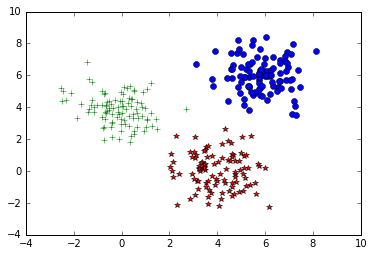

In [26]:
import pylab 
import json

pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
pylab.show()

Within Set Sum of Squared Error = 460.010226978 (iteration 1)
Final centroids for 1 iterations
[-0.55253826  4.59401976]
[ 2.73054577  1.08469506]
[ 5.82531712  6.01411775]


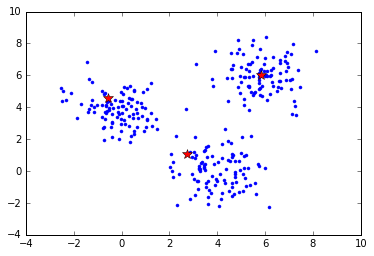

Within Set Sum of Squared Error = 370.852596409 (iteration 10)
Final centroids for 10 iterations
[ 4.00126628  0.0255958 ]
[-0.14888591  3.86336343]
[ 5.82531712  6.01411775]


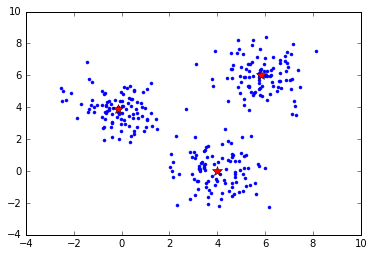

Within Set Sum of Squared Error = 370.852596409 (iteration 20)
Final centroids for 20 iterations
[-0.14888591  3.86336343]
[ 4.00126628  0.0255958 ]
[ 5.82531712  6.01411775]


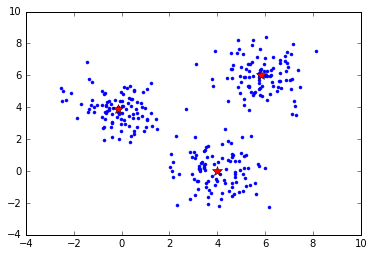

Within Set Sum of Squared Error = 370.852596409 (iteration 100)
Final centroids for 100 iterations
[ 4.00126628  0.0255958 ]
[-0.14888591  3.86336343]
[ 5.82531712  6.01411775]


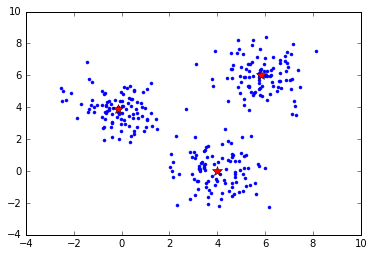

[772.7360105503784, 370.8525964088408, 370.8525964088408, 370.8525964088408, 370.8525964088408, 370.8525964088408, 370.8525964088408]


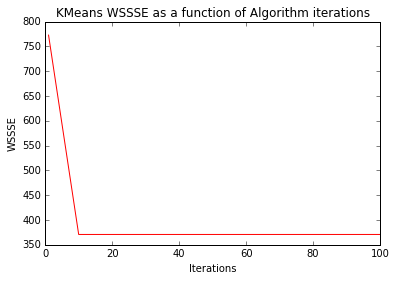

In [35]:
iterations = [1,10,20,100]

# Load and parse the data
data = sc.textFile("/home/jovyan/work/root/w261/HW10/data/three_clusters.txt")
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

for i in iterations:

    ## Not sure what the difference is 
    ## between max iterations and 
    ## runs
    
    clusters = KMeans.train(parsedData, 3,
                            maxIterations=i,
                            runs=3,
                            initializationMode="random")

    # Evaluate clustering by computing Within Set Sum of Squared Errors
    def error(point):
        center = clusters.centers[clusters.predict(point)]
        return sqrt(sum([x**2 for x in (point - center)]))

    WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("Within Set Sum of Squared Error = " + str(WSSSE) +" (iteration %d)"%i)

    print("Final centroids for %d iterations"%i)
    for centroid in clusters.centers:
        print centroid
        
    plot_iteration(clusters.centers)
    
iterations_2 = [1, 10, 20, 30, 40, 50, 100]

WSSSEs = {}
WSSSEs_list = []

for i in iterations_2:
    
    clusters = KMeans.train(parsedData, 3,
                            maxIterations=i,
                            runs=3,
                            initializationMode="random")
    
    def error(point):
        center = clusters.centers[clusters.predict(point)]
        return sqrt(sum([x**2 for x in (point - center)]))
    
    WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    WSSSEs_list.append(WSSSE)
    
pylab.plot(iterations_2, WSSSEs_list, '-r')

pylab.xlabel('Iterations')
pylab.ylabel('WSSSE')
pylab.title('KMeans WSSSE as a function of Algorithm iterations')
    
print WSSSEs_list

<a name="HW10.4"><h2 style="color:darkblue"> HW10.4: KMeans Experiments  </h2>
[Back to Table of Contents](#TOC)

Using this provided [homegrown Kmeans code](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb)   repeat the experiments in HW10.3. Explain any differences between the results in HW10.3 and HW10.4. 

##### ANSWER:

One of the main differences between the code HW10.3 and HW10.4 (besides the fact that the first uses MLLib and the second uses homegrown code) is that in HW10.3 we run the algorithm for a set of iterations whereas in HW10.4 we simply stop running the algorithm once we reach a convergence situation.  Assessing the final centroids obtained from the homegrown code we see that (for all runs of 10 iterations or more) the results are virtually identical to those obtained in HW10.3.

#######################################################
Running K-means for 1 iterations or until convergence
#######################################################
Iteration 0
[[ 5.52621462  5.29259572]
 [ 3.97758729 -0.33678981]
 [-0.17737956  3.86339582]]


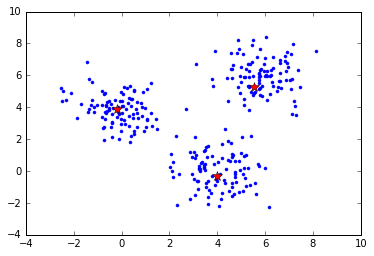

Final Results:
[[ 5.52621462  5.29259572]
 [ 3.97758729 -0.33678981]
 [-0.17737956  3.86339582]]
#######################################################
Running K-means for 10 iterations or until convergence
#######################################################
Iteration 0
[[ 3.08048755  5.28516774]
 [ 4.74439779  0.98746865]
 [ 1.20758557  1.18622693]]


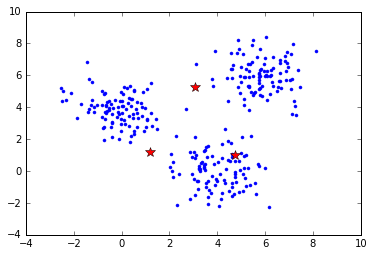

Iteration 1
[[ 4.47802642  5.80620298]
 [ 4.31591764  0.15617738]
 [ 0.02864429  3.08458828]]


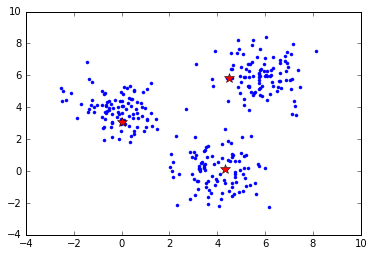

Iteration 2
[[  5.79409601e+00   5.99279141e+00]
 [  4.01851632e+00   3.64464483e-03]
 [ -1.52670639e-01   3.84674945e+00]]


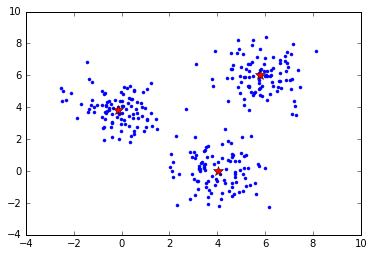

Iteration 3
[[ 5.82531712  6.01411775]
 [ 4.00126628  0.0255958 ]
 [-0.14888591  3.86336343]]


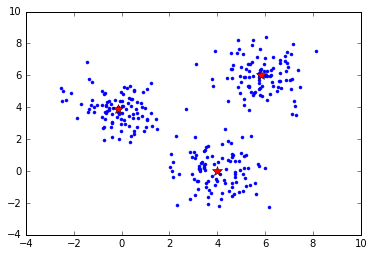

Final Results:
[[ 5.82531712  6.01411775]
 [ 4.00126628  0.0255958 ]
 [-0.14888591  3.86336343]]
#######################################################
Running K-means for 20 iterations or until convergence
#######################################################
Iteration 0
[[ 3.6173404  -0.54821115]
 [ 4.75258754  4.48930889]
 [-0.40744113  3.64314036]]


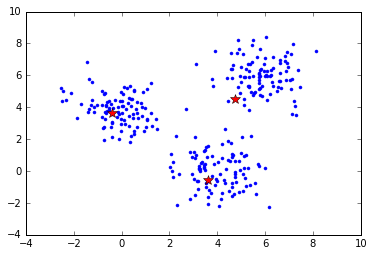

Iteration 1
[[ 3.97261379 -0.04525464]
 [ 5.76910372  5.88674242]
 [-0.17737956  3.86339582]]


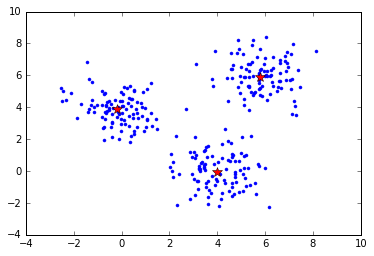

Iteration 2
[[ 4.00126628  0.0255958 ]
 [ 5.82531712  6.01411775]
 [-0.14888591  3.86336343]]


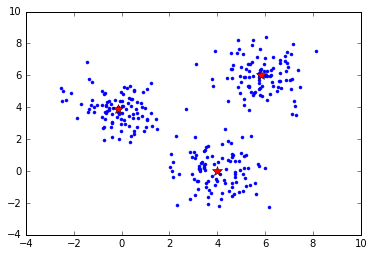

Final Results:
[[ 4.00126628  0.0255958 ]
 [ 5.82531712  6.01411775]
 [-0.14888591  3.86336343]]
#######################################################
Running K-means for 100 iterations or until convergence
#######################################################
Iteration 0
[[ 2.82063563  5.02272677]
 [ 2.5125251   0.06090724]
 [ 4.6051602   0.3226123 ]]


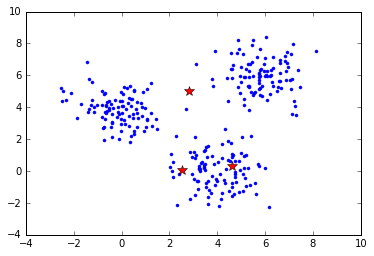

Iteration 1
[[ 2.93911936  5.09621136]
 [ 2.465994    0.38804237]
 [ 4.70831627  0.20673941]]


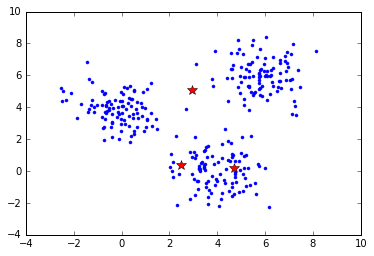

Iteration 2
[[ 3.10571967  5.23673864]
 [ 2.00832824  1.11567392]
 [ 4.68071877 -0.03780943]]


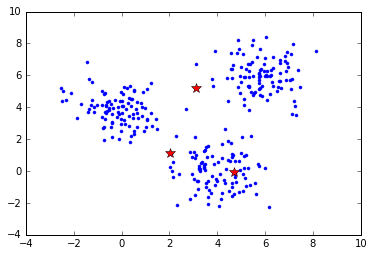

Iteration 3
[[ 3.93219217  5.58908272]
 [ 0.63515236  2.58042078]
 [ 4.32840259 -0.13654857]]


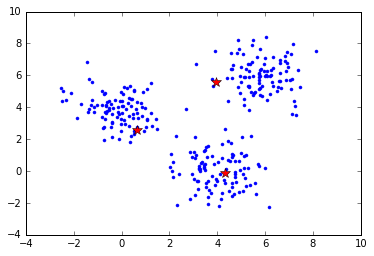

Iteration 4
[[ 5.74953618  5.98796728]
 [-0.11302076  3.78634929]
 [ 4.04878511 -0.02975508]]


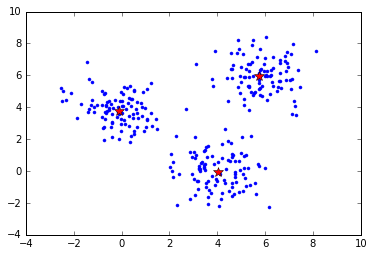

Iteration 5
[[ 5.82531712  6.01411775]
 [-0.14888591  3.86336343]
 [ 4.00126628  0.0255958 ]]


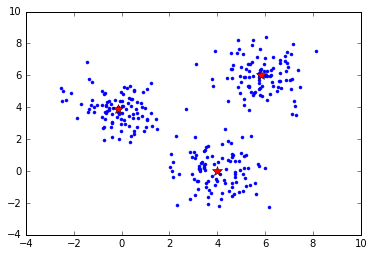

Final Results:
[[ 5.82531712  6.01411775]
 [-0.14888591  3.86336343]
 [ 4.00126628  0.0255958 ]]


In [34]:
K = 3
# Initialization: initialization of parameter is done using a normal random distribution
# centroids = np.random.randn(3,2) + 2

D = sc.textFile("/home/jovyan/work/root/w261/HW10/data/three_clusters.txt").cache()
# iter_num = 0
for j in iterations:
    iter_num = 0
    centroids = np.random.randn(3,2) + 2
    print "#######################################################"
    print "Running K-means for %d iterations or until convergence"%j
    print "#######################################################"
    for i in range(1,j + 1):
        res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
        res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
        centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size
        if np.sum(np.absolute(centroids_new-centroids))<0.01:
            break
        print "Iteration " + str(iter_num)
        iter_num = iter_num + 1 
        centroids = centroids_new
        print centroids
        plot_iteration(centroids)
    print "Final Results:"
    print centroids

<a name="HW10.4.1"><h2 style="color:darkblue"> HW10.4.1: Making Homegrown KMeans more efficient  </h2>
[Back to Table of Contents](#TOC)

The above provided homegrown KMeans implentation in not the most efficient. How can you make it more efficient? Make this change in the code and show it work and comment on the gains you achieve. 

### HINT: have a look at  [this linear regression notebook](    http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb)

##### ANSWER:

__An important optimization that the homegrown code in HW10.4 can benefit from is the storage of the current centroids at each of the iterations in memory in the mappers and reducers in the Spark executors.__ Specifically, I modified the code to broadcast the cetroids at the beginning of each iteration to the executors:

            centroidsBroadcast = sc.broadcast(centroids)

And I also made sure that at any poiunt that spark was using the centroids, they were read from the broadcast values (this was primarily achieved through refactoring the nearest_centroid function).

    ## Calculate which class each data point belongs to
    ## See how we have modified the code to accomodate the new
    ## broadcasting scheme
    def nearest_centroidV2(line):
        x = np.array([float(f) for f in line.split(' ')])
        closest_centroid_idx = np.sum((x - centroidsBroadcast.value)**2, axis=1).argmin()
        return (closest_centroid_idx,(x,1))

Another important reason that the homegrown KMeans implementation is not the most efficient because it does not take full advantage of Spark's in memory computation through RDD transformations. Punctually, The code used in HW10.4 takes a collect action immediately after summing up the coordinates of the points which is an input to compute the new centroids:

    res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
    
The code then proceeds to sort the summed intermediate inputs by centroid ID and then computes the new centroids by dividing each component of the aggregated intermediate inputs by the number of points in the respective new centroid:

    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size

__Alternatively, I have opted to do all the above operations as transformations and then finally collect the new centroids:__

    res = D.map(nearest_centroid)\
    .reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1]))\
    .sortByKey()\
    .map(lambda x: x[1][0]/x[1][1])
    centroids_new = np.array(res.collect())

This way we are both benefitting from the efficiency optimizations of Spark under the hood for the sorting and final aggregation as well as only instantiating the data locally when strictly necessary.

In [37]:
## Calculate which class each data point belongs to
## See how we have modified the code to accomodate the new
## broadcasting scheme
def nearest_centroidV2(line):
    x = np.array([float(f) for f in line.split(' ')])
    closest_centroid_idx = np.sum((x - centroidsBroadcast.value)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

#######################################################
Running K-means for 1 iterations or until convergence
#######################################################
Below are the initial centroids (1 iterations run)
[[ 0.49397127  0.65223055]
 [ 2.30752735  3.42422923]
 [ 2.55594637  2.45062702]]
Iteration 0
[[ 1.22784112  0.93977651]
 [ 3.17386602  5.22538251]
 [ 4.27328884  0.45029055]]


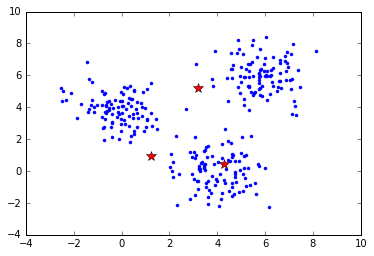

Final Results (1 iterations run)
[[ 1.22784112  0.93977651]
 [ 3.17386602  5.22538251]
 [ 4.27328884  0.45029055]]
#######################################################
Running K-means for 10 iterations or until convergence
#######################################################
Below are the initial centroids (10 iterations run)
[[ 1.19270251  2.92048288]
 [ 1.21311328  3.0150837 ]
 [ 2.16549651  2.28809035]]
Iteration 0
[[ 0.00965804  2.67631215]
 [ 0.49958085  4.72782298]
 [ 4.91523811  2.72382603]]


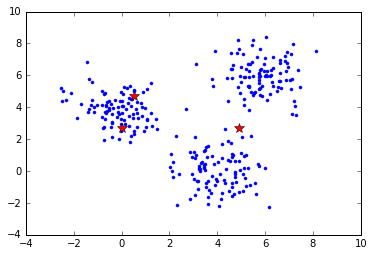

Iteration 1
[[ 0.28561735  2.66477497]
 [-0.11104531  4.64298323]
 [ 5.04299098  3.09674209]]


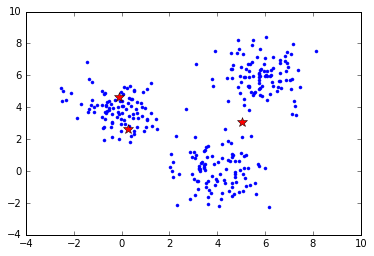

Iteration 2
[[ 0.64712813  2.36617643]
 [-0.39553215  4.47740225]
 [ 5.03600901  3.14920663]]


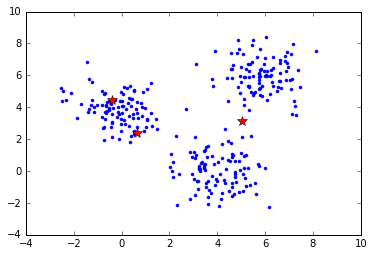

Iteration 3
[[ 1.48865951  1.52518932]
 [-0.44535573  4.3665952 ]
 [ 5.21749228  3.50920147]]


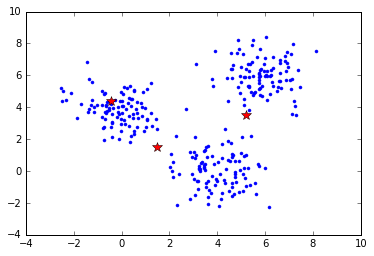

Iteration 4
[[ 3.00016645  0.32356396]
 [-0.32524425  4.11963903]
 [ 5.62405119  4.73703174]]


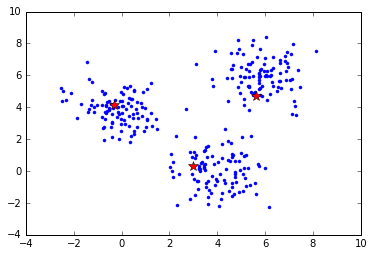

Iteration 5
[[ 3.97261379 -0.04525464]
 [-0.14888591  3.86336343]
 [ 5.79917284  5.906418  ]]


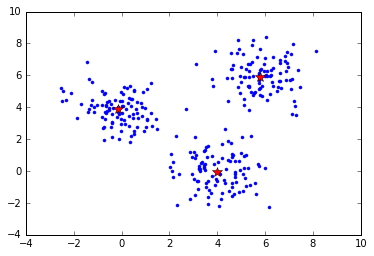

Iteration 6
[[ 4.00126628  0.0255958 ]
 [-0.14888591  3.86336343]
 [ 5.82531712  6.01411775]]


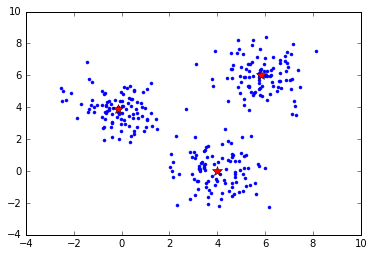

Final Results (10 iterations run)
[[ 4.00126628  0.0255958 ]
 [-0.14888591  3.86336343]
 [ 5.82531712  6.01411775]]
#######################################################
Running K-means for 20 iterations or until convergence
#######################################################
Below are the initial centroids (20 iterations run)
[[ 0.53847122  3.37544695]
 [ 2.61221318  1.55309982]
 [ 1.92470821  2.09499363]]
Iteration 0
[[ 0.42880909  4.3150729 ]
 [ 4.89331543  2.18470788]
 [ 4.88561663  5.88834063]]


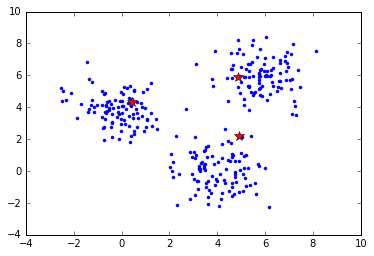

Iteration 1
[[-0.14888591  3.86336343]
 [ 4.07635001  0.13035415]
 [ 5.80200298  6.08809152]]


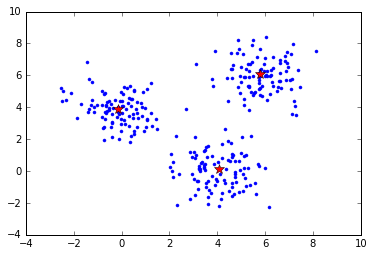

Iteration 2
[[-0.14888591  3.86336343]
 [ 4.00126628  0.0255958 ]
 [ 5.82531712  6.01411775]]


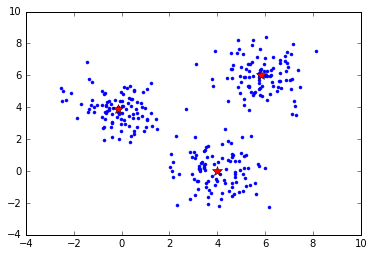

Final Results (20 iterations run)
[[-0.14888591  3.86336343]
 [ 4.00126628  0.0255958 ]
 [ 5.82531712  6.01411775]]
#######################################################
Running K-means for 100 iterations or until convergence
#######################################################
Below are the initial centroids (100 iterations run)
[[ 1.46765733  2.91904632]
 [ 1.33848637  3.81127564]
 [ 2.25656354  3.11999384]]
Iteration 0
[[ 0.78670068  1.90449257]
 [-0.04167986  4.45611982]
 [ 5.03154104  3.04720399]]


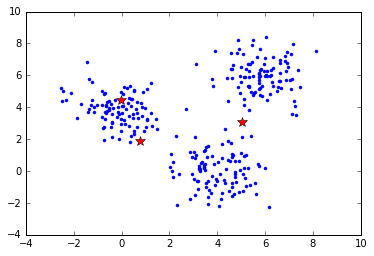

Iteration 1
[[ 2.09906514  0.81173748]
 [-0.28673451  4.25256786]
 [ 5.35460912  3.78317651]]


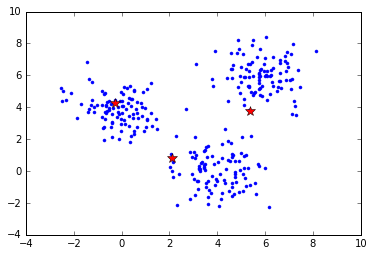

Iteration 2
[[ 3.76433825 -0.05557738]
 [-0.21190783  3.91177559]
 [ 5.73030163  5.53473536]]


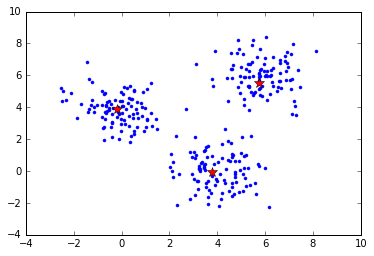

Iteration 3
[[ 4.00126628  0.0255958 ]
 [-0.14888591  3.86336343]
 [ 5.82531712  6.01411775]]


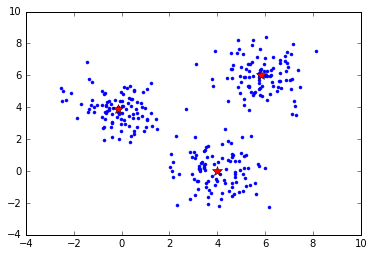

Final Results (100 iterations run)
[[ 4.00126628  0.0255958 ]
 [-0.14888591  3.86336343]
 [ 5.82531712  6.01411775]]


In [42]:
K = 3
# Initialization: initialization of parameter is done using a normal random distribution

D = sc.textFile("/home/jovyan/work/root/w261/HW10/data/three_clusters.txt").cache()

for j in iterations:
    iter_num = 0
    centroids = np.random.randn(3,2) + 2
    print "#######################################################"
    print "Running K-means for %d iterations or until convergence"%j
    print "#######################################################"
    print "Below are the initial centroids (%d iterations run)"%j
    print centroids
    for i in range(1,j +1):  
        ## Below I am broadcasting the current centroids to the
        ## mappers and reducers in the executors
        centroidsBroadcast = sc.broadcast(centroids)
        ## Here we are doing all the transformations in memory
        ## before the final collect action
        res = D.map(nearest_centroidV2)\
        .reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1]))\
        .sortByKey()\
        .map(lambda x: x[1][0]/x[1][1])
        centroids_new = np.array(res.collect())
        if np.sum(np.absolute(centroids_new-centroids))<0.01:
            break
        print "Iteration " + str(iter_num)
        iter_num = iter_num + 1 
        centroids = centroids_new
        print centroids
        plot_iteration(centroids)
    print "Final Results (%d iterations run)"%j
    print centroids

In [69]:
## Drivers & Runners

In [70]:
## Run Scripts, S3 Sync

<a name="HW10.5"><h2 style="color:darkgreen"> HW10.5: OPTIONAL Weighted KMeans  </h2>
[Back to Table of Contents](#TOC)

Using this provided [homegrown Kmeans code](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb), modify it to do a weighted KMeans and repeat the experiements in HW10.3. Explain  any differences between the results in HW10.3 and HW10.5.

NOTE: Weight each example as follows using the inverse vector length (Euclidean norm): 

> weight(X)= 1/||X||, 

where ||X|| = SQRT(X.X)= SQRT(X1^2 + X2^2)

Here X is vector made up of two values X1 and X2.

__[Please incorporate all referenced notebooks directly into this master notebook as cells for HW submission. I.e., HW submissions should comprise of just one notebook]__

In [71]:
## Code goes here

In [72]:
## Drivers & Runners

In [73]:
## Run Scripts, S3 Sync

<a name="HW10.6"><h2 style="color:darkblue"> HW10.6 OPTIONAL Linear Regression</h2>
[Back to Table of Contents](#TOC)
<a name="HW10.6.1"><h2 style="color:darkblue"> HW10.6.1 OPTIONAL Linear Regression</h2>
[Back to Table of Contents](#TOC)

Using [this linear regression notebook](    http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb):


* Generate 2 sets of data with 100 data points using the data generation code provided and plot each in separate plots. Call one the training set and the other the testing set.

* Using MLLib's LinearRegressionWithSGD train up a linear regression model with the training dataset and evaluate with the testing set. What a good number of iterations for training the linear regression model? Justify with plots (e.g., plot MSE as a function of the number of iterations) and words. 


<a name="HW10.6.2"><h2 style="color:darkblue"> HW10.6.2 OPTIONAL Linear Regression</h2>
[Back to Table of Contents](#TOC)

In the notebook provided above, in the cell labeled "Gradient descent (regularization)".

* Fill in the blanks and get this code to work for LASS0 and RIDGE linear regression.

* Using the data from HW10.6.1 tune the hyper parameters of your LASS0 and RIDGE regression. Report your findings with words and plots.

In [74]:
## Code goes here

In [75]:
## Drivers & Runners

In [76]:
## Run Scripts, S3 Sync

<a name="HW10.7"><h2 style="color:darkgreen"> HW10.7 OPTIONAL Error surfaces </h2>
[Back to Table of Contents](#TOC)

Here is a link to R code with 1 test drivers that plots the linear regression model in  model space and in the domain space:

> https://www.dropbox.com/s/3xc3kwda6d254l5/PlotModelAndDomainSpaces.R?dl=0

Here is a sample output from this script: 
      
> https://www.dropbox.com/s/my3tnhxx7fr5qs0/image%20%281%29.png?dl=0

Please use this as inspiration and code a equivalent error surface and heatmap (with isolines) in Spark and show the trajectory of learning taken during gradient descent(after each n-iterations of Gradient Descent):


Using Spark and  Python (using the above R Script as inspiration), plot the error surface for the linear regression model using a heatmap and contour plot. 
Also plot the current model in the original domain space for every 10th iteration.  Plot them side by side if possible  for each iteration: lefthand side plot is the model space(w0 and w01) and the righthand side plot is domain space (plot the corresponding model and training data in the problem domain space) with a final pair of graphs showing the entire trajectory in the model and domain space. Make sure to label your plots with iteration numbers, function, model space versus original domain space, MSE on the training data etc.

Also plot the MSE as a function of each iteration (possibly every 10th iteration). Dont forget to label both axis and the graph also. __[Please incorporate all referenced notebooks directly into this master notebook as cells for HW submission. I.e., HW submissions should comprise of just one notebook]__





In [77]:
## Code goes here

In [78]:
## Drivers & Runners

In [79]:
## Run Scripts, S3 Sync

[Back to Table of Contents](#TOC)
<center><div class='jumbotron'><h2 style='color:green'>-------  END OF HOWEWORK --------</h2></div></center>